In [9]:
import numpy as np
import time
import matplotlib.pyplot as plt

import utils
from zonotope import Zonotope
from LPM import LPM

In [2]:
# System
dt = 0.1
n_s = 4  # State dimension
n_c = 2  # Control dimension
n_m = 2  # Measurement dimension

A = np.eye(n_s)  # Dynamics matrix
A[0:2,2:4] = dt*np.eye(2)
B = np.array([[dt**2/2, 0],  # Control matrix
              [0, dt**2/2],
              [dt, 0],
              [0, dt]])
C = np.array([[1, 0, 0, 0],  # Measurement matrix
              [0, 1, 0, 0]])

Q_LQR = np.eye(n_s)
R_LQR = np.eye(n_c)
K = utils.dlqr_calculate(A, B, Q_LQR, R_LQR)

Q = 0.01

In [3]:
LPM = LPM('quadrotor_linear_planning_model.mat')

LPM FRS Computation

In [4]:
# Peak velocity space
v_max = 3
c_pk = np.zeros((2,1))
G_pk = v_max * np.eye(2)
V_pk = Zonotope(c_pk, G_pk)

# Zeros zonotope
Z0 = Zonotope(np.zeros((2,1)), np.zeros((2,2)))

N = len(LPM.time)  # Trajectory length
P_LPM = LPM.P_mat.T

PRS = N * [None]

Center:
	[[0.]
	 [0.]
	 [0.]
	 [0.]]
Generators:
	[[0. 0.]
	 [0. 0.]
	 [3. 0.]
	 [0. 3.]]
Center:
	[[0.005]
	 [0.01 ]
	 [0.   ]
	 [0.   ]]
Generators:
	[[1.289e-03 0.000e+00]
	 [0.000e+00 1.289e-03]
	 [3.000e+00 0.000e+00]
	 [0.000e+00 3.000e+00]]
Center:
	[[0.02]
	 [0.04]
	 [0.  ]
	 [0.  ]]
Generators:
	[[0.01 0.  ]
	 [0.   0.01]
	 [3.   0.  ]
	 [0.   3.  ]]
Center:
	[[0.045]
	 [0.089]
	 [0.   ]
	 [0.   ]]
Generators:
	[[0.032 0.   ]
	 [0.    0.032]
	 [3.    0.   ]
	 [0.    3.   ]]
Center:
	[[0.079]
	 [0.158]
	 [0.   ]
	 [0.   ]]
Generators:
	[[0.074 0.   ]
	 [0.    0.074]
	 [3.    0.   ]
	 [0.    3.   ]]
Center:
	[[0.123]
	 [0.245]
	 [0.   ]
	 [0.   ]]
Generators:
	[[0.139 0.   ]
	 [0.    0.139]
	 [3.    0.   ]
	 [0.    3.   ]]
Center:
	[[0.175]
	 [0.35 ]
	 [0.   ]
	 [0.   ]]
Generators:
	[[0.23 0.  ]
	 [0.   0.23]
	 [3.   0.  ]
	 [0.   3.  ]]
Center:
	[[0.236]
	 [0.472]
	 [0.   ]
	 [0.   ]]
Generators:
	[[0.351 0.   ]
	 [0.    0.351]
	 [3.    0.   ]
	 [0.    3.   ]]
Center:
	[[0.305

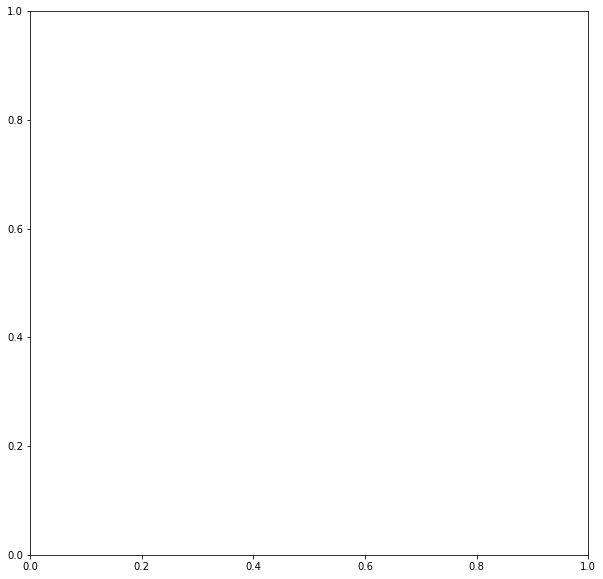

In [11]:
# Fixed initial conditions
v_0 = np.array([4,2])
a_0 = np.array([5,5])
k_0 = np.vstack((v_0, a_0))

p_from_ic = P_LPM[:,1:3] @ k_0

fig, ax = plt.subplots(figsize=(10,10))

for i in range(N):
    P_from_vpk = P_LPM[i,2] * V_pk
    PRS[i] = P_from_vpk.augment(V_pk) + np.vstack((p_from_ic[i,:][:,None], np.zeros((2,1))))
    #PRS[i].plot(ax)
    print(PRS[i])
